# **BME 548: Final Project - Classfication of Chest XRay for diagnosis of COVID 19**

## Create dataset from 5 different datasets

In [9]:
import numpy as np
import pandas as pd
import os
import random 
from shutil import copyfile
import cv2

In [10]:
!pip install pydicom

In [11]:
import pydicom as dicom

In [3]:
!git clone https://github.com/ieee8023/covid-chestxray-dataset
!git clone https://github.com/agchung/Figure1-COVID-chestxray-dataset
!git clone https://github.com/agchung/Actualmed-COVID-chestxray-dataset

Cloning into 'covid-chestxray-dataset'...
remote: Enumerating objects: 3614, done.
remote: Total 3614 (delta 0), reused 0 (delta 0), pack-reused 3614
Receiving objects: 100% (3614/3614), 632.87 MiB | 42.52 MiB/s, done.
Resolving deltas: 100% (1433/1433), done.
Checking out files: 100% (1173/1173), done.
Cloning into 'Figure1-COVID-chestxray-dataset'...
remote: Enumerating objects: 112, done.
remote: Counting objects: 100% (112/112), done.
remote: Compressing objects: 100% (97/97), done.
remote: Total 112 (delta 28), reused 95 (delta 14), pack-reused 0
Receiving objects: 100% (112/112), 14.13 MiB | 40.52 MiB/s, done.
Resolving deltas: 100% (28/28), done.
Cloning into 'Actualmed-COVID-chestxray-dataset'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 422 (delta 1), reused 6 (delta 1), pack-reused 412
Receiving objects: 100% (422/422), 1.56 GiB | 31.75 MiB/s, done.
Resolving deltas: 100% (

In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 69 bytes


In [5]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database
!unzip covid19-radiography-database.zip

100% 1.14G/1.15G [00:19<00:00, 84.1MB/s]
100% 1.15G/1.15G [00:19<00:00, 61.9MB/s]
Archive:  covid19-radiography-database.zip
  inflating: COVID-19 Radiography Database/COVID-19.metadata.xlsx  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (1).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (10).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (100).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (101).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (102).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (103).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (104).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (105).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (106).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (107).png  
  inflating: COVID-19 Radiography Database/COVID-19/COVID-19 (108).png  
  infla

In [6]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.9MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.9-cp36-none-any.whl size=73265 sha256=f75ea2c7f0bf6d9bc6ab7ae112be85d852c8acabf6d7612ba58c75d2e0000d92
  Stored in directory: /root/.cache/pip/wheels/68/6d/9b/7a98271454edcba3b56328cbc78c037286e787d004c8afee71
Successfully built kaggle
  Found existing installation: kaggle 1.5.9
    Uninstalling kaggle-1.5.9:
      Successfully uninstalled kaggle-1.5.9


In [7]:
!kaggle competitions download -c rsna-pneumonia-detection-challenge
!unzip rsna-pneumonia-detection-challenge.zip

Streaming output truncated to the last 5000 lines.
  inflating: stage_2_train_images/d5231546-354e-4071-9af1-6644beabfd86.dcm  
  inflating: stage_2_train_images/d5252a78-3ea1-48e9-9ffb-e7535be3ce80.dcm  
  inflating: stage_2_train_images/d525eafb-8908-45fd-a942-48d07c435487.dcm  
  inflating: stage_2_train_images/d5265640-17db-4880-866d-d2952e32941c.dcm  
  inflating: stage_2_train_images/d5277276-f8f8-40e9-b8e1-791cf5d96ac0.dcm  
  inflating: stage_2_train_images/d528d9e9-647a-4e2e-a16c-bd5e32a5bbf5.dcm  
  inflating: stage_2_train_images/d5293a3e-f050-4b98-8bbf-1f40e25bced5.dcm  
  inflating: stage_2_train_images/d52cbb5a-1d0a-457d-8c72-0f7aeec21ca7.dcm  
  inflating: stage_2_train_images/d52ce67b-be7c-4349-8dc4-38562928d208.dcm  
  inflating: stage_2_train_images/d535a3c8-c4a4-4856-b5cd-17f6332eac8b.dcm  
  inflating: stage_2_train_images/d5360dc4-6bea-4a7b-bc49-5b2547ad7877.dcm  
  inflating: stage_2_train_images/d5364bc1-bc2a-4bd0-a1bd-0cfb5a369ccc.dcm  
  inflating: stage_2_trai

In [12]:
#adapted from https://github.com/lindawangg/COVID-Net/blob/master/create_COVIDx.ipynb

# set parameters here
savepath = 'data'
seed = 0
np.random.seed(seed) # Reset the seed so all runs are the same.
random.seed(seed)
MAXVAL = 255  # Range [0 255]

# path to covid-19 dataset from https://github.com/ieee8023/covid-chestxray-dataset
cohen_imgpath = 'covid-chestxray-dataset/images' 
cohen_csvpath = 'covid-chestxray-dataset/metadata.csv'

# path to covid-19 dataset from https://github.com/agchung/Figure1-COVID-chestxray-dataset
fig1_imgpath = 'Figure1-COVID-chestxray-dataset/images'
fig1_csvpath = 'Figure1-COVID-chestxray-dataset/metadata.csv'

# path to covid-19 dataset from https://github.com/agchung/Actualmed-COVID-chestxray-dataset
actmed_imgpath = 'Actualmed-COVID-chestxray-dataset/images'
actmed_csvpath = 'Actualmed-COVID-chestxray-dataset/metadata.csv'

# path to covid-19 dataset from https://www.kaggle.com/tawsifurrahman/covid19-radiography-database
sirm_imgpath = 'COVID-19 Radiography Database/COVID-19'
sirm_csvpath = '/content/COVID-19 Radiography Database/COVID-19.metadata.xlsx'

# path to https://www.kaggle.com/c/rsna-pneumonia-detection-challenge
rsna_datapath = 'rsna-pneumonia-detection-challenge'
# get all the normal from here
rsna_csvname = 'stage_2_detailed_class_info.csv' 
# get all the 1s from here since 1 indicate pneumonia
# found that images that aren't pneunmonia and also not normal are classified as 0s
rsna_csvname2 = 'stage_2_train_labels.csv' 
rsna_imgpath = 'stage_2_train_images'

# parameters for COVIDx dataset
train = []
test = []
test_count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}
train_count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}

mapping = dict()
mapping['COVID-19'] = 'COVID-19'
mapping['SARS'] = 'pneumonia'
mapping['MERS'] = 'pneumonia'
mapping['Streptococcus'] = 'pneumonia'
mapping['Klebsiella'] = 'pneumonia'
mapping['Chlamydophila'] = 'pneumonia'
mapping['Legionella'] = 'pneumonia'
mapping['E.Coli'] = 'pneumonia'
mapping['Normal'] = 'normal'
mapping['Lung Opacity'] = 'pneumonia'
mapping['1'] = 'pneumonia'

# train/test split
split = 0.1

# to avoid duplicates
patient_imgpath = {}

In [13]:
# adapted from https://github.com/mlmed/torchxrayvision/blob/master/torchxrayvision/datasets.py#L814
cohen_csv = pd.read_csv(cohen_csvpath)

#idx_pa = csv["view"] == "PA"  # Keep only the PA view
views = ["PA", "AP", "AP Supine", "AP semi erect", "AP erect"]
cohen_idx_keep = cohen_csv.view.isin(views)
cohen_csv = cohen_csv[cohen_idx_keep]

fig1_csv = pd.read_csv(fig1_csvpath, encoding='ISO-8859-1', nrows=None)
actmed_csv = pd.read_csv(actmed_csvpath, nrows=None)

sirm_csv = pd.read_excel(sirm_csvpath)

In [14]:
# get non-COVID19 viral, bacteria, and COVID-19 infections from covid-chestxray-dataset, figure1 and actualmed
# stored as patient id, image filename and label
filename_label = {'normal': [], 'pneumonia': [], 'COVID-19': []}
count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}
covid_ds = {'cohen': [], 'fig1': [], 'actmed': [], 'sirm': []}

for index, row in cohen_csv.iterrows():
    f = row['finding'].split('/')[-1] # take final finding in hierarchy, for the case of COVID-19, ARDS
    if f in mapping: # 
        count[mapping[f]] += 1
        entry = [str(row['patientid']), row['filename'], mapping[f], 'cohen']
        filename_label[mapping[f]].append(entry)
        if mapping[f] == 'COVID-19':
            covid_ds['cohen'].append(str(row['patientid']))
        
for index, row in fig1_csv.iterrows():
    if not str(row['finding']) == 'nan':
        f = row['finding'].split(',')[0] # take the first finding
        if f in mapping: # 
            count[mapping[f]] += 1
            if os.path.exists(os.path.join(fig1_imgpath, row['patientid'] + '.jpg')):
                entry = [row['patientid'], row['patientid'] + '.jpg', mapping[f], 'fig1']
            elif os.path.exists(os.path.join(fig1_imgpath, row['patientid'] + '.png')):
                entry = [row['patientid'], row['patientid'] + '.png', mapping[f], 'fig1']
            filename_label[mapping[f]].append(entry)
            if mapping[f] == 'COVID-19':
                covid_ds['fig1'].append(row['patientid'])

for index, row in actmed_csv.iterrows():
    if not str(row['finding']) == 'nan':
        f = row['finding'].split(',')[0]
        if f in mapping:
            count[mapping[f]] += 1
            entry = [row['patientid'], row['imagename'], mapping[f], 'actmed']
            filename_label[mapping[f]].append(entry)
            if mapping[f] == 'COVID-19':
                covid_ds['actmed'].append(row['patientid'])
    
sirm = set(sirm_csv['URL'])
cohen = set(cohen_csv['url'])
discard = ['100', '101', '102', '103', '104', '105', 
           '110', '111', '112', '113', '122', '123', 
           '124', '125', '126', '217']

for idx, row in sirm_csv.iterrows():
    patientid = row['FILE NAME']
    if row['URL'] not in cohen and patientid[patientid.find('(')+1:patientid.find(')')] not in discard:
        count[mapping['COVID-19']] += 1
        imagename = patientid + '.' + row['FORMAT'].lower()
        if not os.path.exists(os.path.join(sirm_imgpath, imagename)):
            imagename = patientid.split('(')[0] + ' ('+ patientid.split('(')[1] + '.' + row['FORMAT'].lower()
        entry = [patientid, imagename, mapping['COVID-19'], 'sirm']
        filename_label[mapping['COVID-19']].append(entry)
        covid_ds['sirm'].append(patientid)
    
print('Data distribution from covid datasets:')
print(count)

Data distribution from covid datasets:
{'normal': 0, 'pneumonia': 57, 'COVID-19': 617}


In [15]:
!mkdir data
!mkdir data/train
!mkdir data/test

In [16]:
# add covid-chestxray-dataset, figure1 and actualmed into COVIDx dataset
# since these datasets don't have test dataset, split into train/test by patientid
# for covid-chestxray-dataset:
# patient 8 is used as non-COVID19 viral test
# patient 31 is used as bacterial test
# patients 19, 20, 36, 42, 86 are used as COVID-19 viral test
# for figure 1:
# patients 24, 25, 27, 29, 30, 32, 33, 36, 37, 38

ds_imgpath = {'cohen': cohen_imgpath, 'fig1': fig1_imgpath, 'actmed': actmed_imgpath, 'sirm': sirm_imgpath}

for key in filename_label.keys():
    arr = np.array(filename_label[key])
    if arr.size == 0:
        continue
    # split by patients
    # num_diff_patients = len(np.unique(arr[:,0]))
    # num_test = max(1, round(split*num_diff_patients))
    # select num_test number of random patients
    # random.sample(list(arr[:,0]), num_test)
    if key == 'pneumonia':
        test_patients = ['8', '31']
    elif key == 'COVID-19':
        test_patients = ['19', '20', '36', '42', '86', 
                         '94', '97', '117', '132', 
                         '138', '144', '150', '163', '169', '174', '175', '179', '190', '191'
                         'COVID-00024', 'COVID-00025', 'COVID-00026', 'COVID-00027', 'COVID-00029',
                         'COVID-00030', 'COVID-00032', 'COVID-00033', 'COVID-00035', 'COVID-00036',
                         'COVID-00037', 'COVID-00038',
                         'ANON24', 'ANON45', 'ANON126', 'ANON106', 'ANON67',
                         'ANON153', 'ANON135', 'ANON44', 'ANON29', 'ANON201', 
                         'ANON191', 'ANON234', 'ANON110', 'ANON112', 'ANON73', 
                         'ANON220', 'ANON189', 'ANON30', 'ANON53', 'ANON46',
                         'ANON218', 'ANON240', 'ANON100', 'ANON237', 'ANON158',
                         'ANON174', 'ANON19', 'ANON195',
                         'COVID-19(119)', 'COVID-19(87)', 'COVID-19(70)', 'COVID-19(94)', 
                         'COVID-19(215)', 'COVID-19(77)', 'COVID-19(213)', 'COVID-19(81)', 
                         'COVID-19(216)', 'COVID-19(72)', 'COVID-19(106)', 'COVID-19(131)', 
                         'COVID-19(107)', 'COVID-19(116)', 'COVID-19(95)', 'COVID-19(214)', 
                         'COVID-19(129)']
    else: 
        test_patients = []
    print('Key: ', key)
    print('Test patients: ', test_patients)
    # go through all the patients
    for patient in arr:
        if patient[0] not in patient_imgpath:
            patient_imgpath[patient[0]] = [patient[1]]
        else:
            if patient[1] not in patient_imgpath[patient[0]]:
                patient_imgpath[patient[0]].append(patient[1])
            else:
                continue  # skip since image has already been written
        if patient[0] in test_patients:
            if patient[3] == 'sirm':
                image = cv2.imread(os.path.join(ds_imgpath[patient[3]], patient[1]))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                patient[1] = patient[1].replace(' ', '')
                cv2.imwrite(os.path.join(savepath, 'test', patient[1]), gray)
            else:
                copyfile(os.path.join(ds_imgpath[patient[3]], patient[1]), os.path.join(savepath, 'test', patient[1]))
            test.append(patient)
            test_count[patient[2]] += 1
        else:
            if patient[3] == 'sirm':
                image = cv2.imread(os.path.join(ds_imgpath[patient[3]], patient[1]))
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                patient[1] = patient[1].replace(' ', '')
                cv2.imwrite(os.path.join(savepath, 'train', patient[1]), gray)
            else:
                copyfile(os.path.join(ds_imgpath[patient[3]], patient[1]), os.path.join(savepath, 'train', patient[1]))
            train.append(patient)
            train_count[patient[2]] += 1

print('test count: ', test_count)
print('train count: ', train_count)

Key:  pneumonia
Test patients:  ['8', '31']
Key:  COVID-19
Test patients:  ['19', '20', '36', '42', '86', '94', '97', '117', '132', '138', '144', '150', '163', '169', '174', '175', '179', '190', '191COVID-00024', 'COVID-00025', 'COVID-00026', 'COVID-00027', 'COVID-00029', 'COVID-00030', 'COVID-00032', 'COVID-00033', 'COVID-00035', 'COVID-00036', 'COVID-00037', 'COVID-00038', 'ANON24', 'ANON45', 'ANON126', 'ANON106', 'ANON67', 'ANON153', 'ANON135', 'ANON44', 'ANON29', 'ANON201', 'ANON191', 'ANON234', 'ANON110', 'ANON112', 'ANON73', 'ANON220', 'ANON189', 'ANON30', 'ANON53', 'ANON46', 'ANON218', 'ANON240', 'ANON100', 'ANON237', 'ANON158', 'ANON174', 'ANON19', 'ANON195', 'COVID-19(119)', 'COVID-19(87)', 'COVID-19(70)', 'COVID-19(94)', 'COVID-19(215)', 'COVID-19(77)', 'COVID-19(213)', 'COVID-19(81)', 'COVID-19(216)', 'COVID-19(72)', 'COVID-19(106)', 'COVID-19(131)', 'COVID-19(107)', 'COVID-19(116)', 'COVID-19(95)', 'COVID-19(214)', 'COVID-19(129)']
test count:  {'normal': 0, 'pneumonia': 5,

In [ ]:
!wget https://github.com/lindawangg/COVID-Net/blob/master/rsna_test_patients_normal.npy
!wget https://github.com/lindawangg/COVID-Net/blob/master/rsna_test_patients_pneumonia.npy

In [17]:
# add normal and rest of pneumonia cases from https://www.kaggle.com/c/rsna-pneumonia-detection-challenge
csv_normal = pd.read_csv(os.path.join(rsna_csvname), nrows=None)
csv_pneu = pd.read_csv(os.path.join(rsna_csvname2), nrows=None)
patients = {'normal': [], 'pneumonia': []}

for index, row in csv_normal.iterrows():
    if row['class'] == 'Normal':
        patients['normal'].append(row['patientId'])

for index, row in csv_pneu.iterrows():
    if int(row['Target']) == 1:
        patients['pneumonia'].append(row['patientId'])

for key in patients.keys():
    arr = np.array(patients[key])
    if arr.size == 0:
        continue
    # split by patients 
    test_patients = np.load(f'rsna_test_patients_{key}_new.npy') # random.sample(list(arr), num_test), download the .npy files from the repo.
    for patient in arr:
        if patient not in patient_imgpath:
            patient_imgpath[patient] = [patient]
        else:
            continue  # skip since image has already been written
                
        ds = dicom.dcmread(os.path.join(rsna_imgpath, patient + '.dcm'))
        pixel_array_numpy = ds.pixel_array
        imgname = patient + '.png'
        if patient in test_patients:
            cv2.imwrite(os.path.join(savepath, 'test', imgname), pixel_array_numpy)
            test.append([patient, imgname, key, 'rsna'])
            test_count[key] += 1
        else:
            cv2.imwrite(os.path.join(savepath, 'train', imgname), pixel_array_numpy)
            train.append([patient, imgname, key, 'rsna'])
            train_count[key] += 1

print('test count: ', test_count)
print('train count: ', train_count)

test count:  {'normal': 885, 'pneumonia': 594, 'COVID-19': 100}
train count:  {'normal': 7966, 'pneumonia': 5475, 'COVID-19': 517}


In [18]:
# final stats
print('Final stats')
print('Train count: ', train_count)
print('Test count: ', test_count)
print('Total length of train: ', len(train))
print('Total length of test: ', len(test))

Final stats
Train count:  {'normal': 7966, 'pneumonia': 5475, 'COVID-19': 517}
Test count:  {'normal': 885, 'pneumonia': 594, 'COVID-19': 100}
Total length of train:  13958
Total length of test:  1579


In [19]:
# export to train and test csv
# format as patientid, filename, label, separated by a space
train_file = open("train_split.txt",'w') 
for sample in train:
    if len(sample) == 4:
        info = str(sample[0]) + ' ' + sample[1] + ' ' + sample[2] + ' ' + sample[3] + '\n'
    else:
        info = str(sample[0]) + ' ' + sample[1] + ' ' + sample[2] + '\n'
    train_file.write(info)

train_file.close()

test_file = open("test_split.txt", 'w')
for sample in test:
    if len(sample) == 4:
        info = str(sample[0]) + ' ' + sample[1] + ' ' + sample[2] + ' ' + sample[3] + '\n'
    else:
        info = str(sample[0]) + ' ' + sample[1] + ' ' + sample[2] + '\n'
    test_file.write(info)

test_file.close()

# **Split Dataset into train, val, and test**

In [81]:
mapping = {'normal': 0, 'pneumonia': 1, 'COVID-19': 2}
test_map = {}
train_map = {}

with open('test_split.txt','r') as f:
    for line in f:
        line = line.split(' ')
        for i,sample in enumerate(line):
            if sample.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
                test_map['data/test/'+sample] = line[i+1]
                break
with open('train_split.txt','r') as f:
    for line in f:
        line = line.split(' ')
        for i,sample in enumerate(line):
            if sample.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.tiff')):
                train_map['data/train/'+sample] = line[i+1]
                break

In [ ]:
!pip install --upgrade scikit-image

In [62]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import glob
import os
import tqdm
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from skimage.filters import difference_of_gaussians, window
from scipy.fftpack import fftn, fftshift


In [63]:
def crop_top(img, percent=0.15):
    offset = int(img.shape[0] * percent)
    return img[offset:]

def central_crop(img):
    size = min(img.shape[0], img.shape[1])
    offset_h = int((img.shape[0] - size) / 2)
    offset_w = int((img.shape[1] - size) / 2)
    return img[offset_h:offset_h + size, offset_w:offset_w + size]

def process_image_file(filepath, top_percent, size):
    img = cv2.imread(filepath,0)
    img = crop_top(img, percent=top_percent)
    img = central_crop(img)
    return img.astype(np.uint8)

def contrast_enhancement(img):
    clahe = cv2.createCLAHE(clipLimit =2.0, tileGridSize=(8,8))
    img = clahe.apply(img)
    return img

def spatial_filters(img,filter):
    if filter == 'bilateral':
        img = cv2.bilateralFilter(img,8,75,75)
    
    if filter == 'gaussian':
        img = cv2.GaussianBlur(img,(5,5),0)

    if filter == 'edge':
        img = cv2.Canny(img,25,100)
    return img

def frequency_filters(img,filter):
    rows, cols = img.shape
    crow, ccol = int(rows / 2), int(cols / 2)  # center
    fft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
    fft_shift = np.fft.fftshift(fft)
    if filter == 'lp':
        # Circular LPF mask, center circle is 1, remaining all zeros
        mask = np.zeros((rows, cols, 2), np.uint8)
        r = 80
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
        mask[mask_area] = 1

        # apply mask and inverse FFT
        fshift = fft_shift * mask
        fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    elif filter == 'hp':
        # Circular HPF mask, center circle is 0, remaining all ones 
        mask = np.ones((rows, cols, 2), np.uint8) 
        r = 150 
        center = [crow, ccol] 
        x, y = np.ogrid[:rows, :cols] 
        mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r 
        # apply mask and inverse FFT 
        fshift = fft_shift * mask 
        fshift_mask_mag = 50 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1])) 
        f_ishift = np.fft.ifftshift(fshift) 
        img_back = cv2.idft(f_ishift) 
        img = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
            
    elif filter == 'bp':
        # Concentric BPF mask,with are between the two cerciles as one's, rest all zero's.
        mask = np.zeros((rows, cols, 2), np.uint8)
        r_out = 80
        r_in = 5
        center = [crow, ccol]
        x, y = np.ogrid[:rows, :cols]
        mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
                                ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
        mask[mask_area] = 1
        # apply mask and inverse FFT
        fshift = fft_shift * mask
        fshift_mask_mag = 2000 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))
        f_ishift = np.fft.ifftshift(fshift)
        img_back = cv2.idft(f_ishift)
        img = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
    
    elif filter == 'bp-1':
        wimage = img * window('hann', img.shape)  # window image to improve FFT
        filtered_image = difference_of_gaussians(img, 1, 1)
        filtered_wimage = filtered_image * window('hann', img.shape)
        im_f_mag = fftshift(np.abs(fftn(wimage)))
        fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))
        img = filtered_image
    
    elif filter == 'bp-2':
        wimage = img * window('hann', img.shape)  # window image to improve FFT
        filtered_image = difference_of_gaussians(img, 10)
        filtered_wimage = filtered_image * window('hann', img.shape)
        im_f_mag = fftshift(np.abs(fftn(wimage)))
        fim_f_mag = fftshift(np.abs(fftn(filtered_wimage)))
        img = filtered_image

    return cv2.normalize(img,None,0,255,cv2.NORM_MINMAX,dtype=cv2.CV_8U )
    
def apply_augmentation(img):
    img = random_ratio_resize(img)
    img = _augmentation_transform.random_transform(img)
    return img

_augmentation_transform = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    brightness_range=(0.9, 1.1),
    zoom_range=(0.85, 1.15),
    fill_mode='constant',
    cval=0.,
)

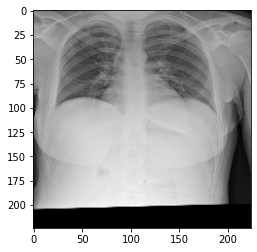

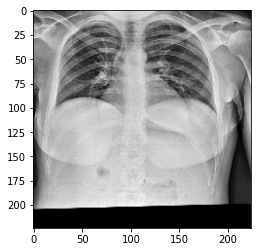

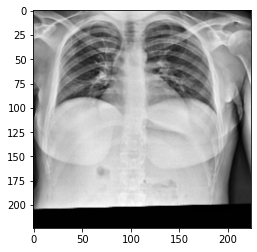

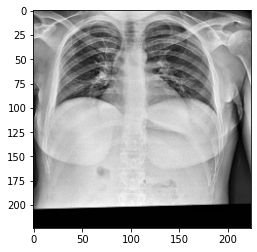

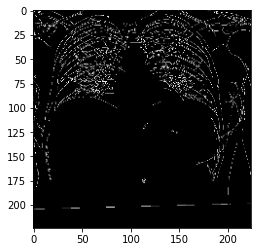

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log


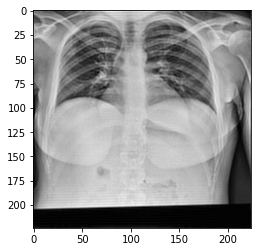

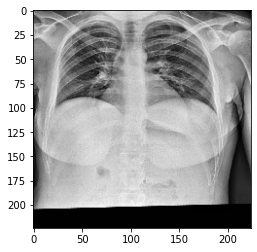

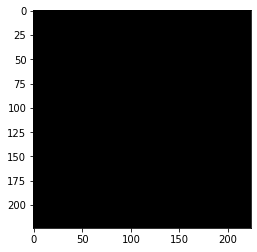

In [44]:
img = process_image_file('data/train/000924cf-0f8d-42bd-9158-1af53881a557.png',0.08,224)
plt.imshow(cv2.resize(img, (224, 224)),cmap='gray')
plt.show()

img = contrast_enhancement(img)
plt.imshow(cv2.resize(img, (224, 224)),cmap='gray')
plt.show()

img1 = spatial_filters(img,'bilateral')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()

img1 = spatial_filters(img,'gaussian')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()

img1 = spatial_filters(img1,'edge')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()

img1 = frequency_filters(img,'lp')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()

img1 = frequency_filters(img,'lp-1')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()

img1 = frequency_filters(img,'bp-1')
plt.imshow(cv2.resize(img1, (224, 224)),cmap='gray')
plt.show()


In [82]:
x_test = []
y_test = []

count = {'normal': 0, 'pneumonia': 0, 'COVID-19': 0}
for k,v in test_map.items():
    image = process_image_file(k,0.08,224) 
    # image = contrast_enhancement(image)
    # image = frequency_filters(image,'lp')
    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    x_test.append(image)
    label = [0.0]*len(mapping)
    label[mapping[v]] = 1.0
    y_test.append(label)

In [83]:
x_data = []
y_data = []
for k,v in train_map.items():
    if v == 'normal':
        if count[v] >= 4000:
            continue
    if v == 'pneumonia':
        if count[v] >= 4000:
            continue
    image = process_image_file(k,0.08,224)
    # image = contrast_enhancement(image)
    # image = spatial_filters(image,'bilateral')
    # image = spatial_filters(image,'edge')

    # image = frequency_filters(image,'lp')
    # image = frequency_filters(image,'hp')
    # image = frequency_filters(image,'bp')
    # image = frequency_filters(image,'lp-1')

    image = cv2.resize(image, (224, 224))
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

    x_data.append(image)

    label = [0.0]*len(mapping)
    label[mapping[v]] = 1.0
    y_data.append(mapping[v])
    count[v] += 1

del test_map
del train_map


In [84]:
x_test = np.array(x_test,dtype=np.uint8)
print(x_test.shape)
y_test = np.array(y_test)
print(y_test.shape)

x_data = np.array(x_data,dtype=np.uint8)
print(x_data.shape)
# x_train = x_train.reshape(-1, 224, 224, 1)
y_data = np.array(y_data)
print(y_data.shape)

(1579, 224, 224, 3)
(1579, 3)
(8517, 224, 224, 3)
(8517,)


(6813, 3) [1. 0. 0.]
(6813, 224, 224, 3) (6813, 3)
(1704, 224, 224, 3) (1704, 3)


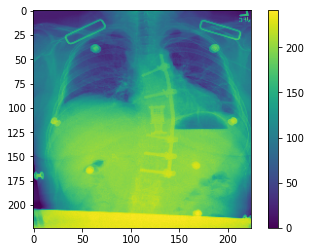

In [85]:
folder = StratifiedKFold(5, shuffle=True)
x_indices = np.arange(0, len(x_data))
train_indices, val_indices = folder.split(x_indices, y_data).__next__()

# shuffling
np.random.shuffle(train_indices)

x_train = x_data[train_indices]
y_train = np.eye(len(mapping))[y_data[train_indices]]
print(y_train.shape,y_train[0])

x_val = x_data[val_indices]
y_val = np.eye(len(mapping))[y_data[val_indices]]

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

plt.imshow(x_train[0,:,:,0])
plt.colorbar()

del x_data
del y_data

In [86]:
count_train = {0:0,1:0,2:0}
print(count_train)
for i in np.argmax(y_train, axis=1):
    count_train[i] += 1
print(count_train)

count_val = {0:0,1:0,2:0}
print(count_val)
for i in np.argmax(y_val, axis=1):
    count_val[i] += 1
print(count_val)

weight_for_0 = (1 / count_train[0])*(y_train.shape[0])/3.0 
weight_for_1 = (1 / count_train[1])*(y_train.shape[0])/3.0
weight_for_2 = (1 / count_train[2])*(y_train.shape[0])/3.0

class_weight = {0: weight_for_0, 1: weight_for_1, 2:weight_for_2}

print(class_weight)

{0: 0, 1: 0, 2: 0}
{0: 3200, 1: 3200, 2: 413}
{0: 0, 1: 0, 2: 0}
{0: 800, 1: 800, 2: 104}
{0: 0.7096874999999999, 1: 0.7096874999999999, 2: 5.498789346246974}


In [ ]:
count_train = {0:0,1:0,2:0}
print(count_train)
for i in np.argmax(y_train, axis=1):
    count_train[i] += 1
print(count_train)

{0: 0, 1: 0, 2: 0}
{0: 3200, 1: 3200, 2: 413}


In [ ]:
# Over sample
from imblearn.over_sampling import SMOTE

og_shape = x_train.shape
x_train = x_train.reshape(og_shape[0], og_shape[1]*og_shape[2]*og_shape[3])
y_train = y_train.argmax(axis=1)

smote = SMOTE(sampling_strategy='minority')
x_train, y_train = smote.fit_sample(x_train, y_train)

y_train = tf.keras.utils.to_categorical(y_train, num_classes=3)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_train.shape)
print(y_train.shape)
x_train = x_train.reshape((x_train.shape[0],og_shape[1],og_shape[2],og_shape[3]))
print(x_train.shape)


(9600, 150528)
(9600, 3)
(9600, 224, 224, 3)


In [ ]:
train_indices = np.arange(0, len(x_train))
np.random.shuffle(train_indices)
print(train_indices)
x_train = x_train[train_indices]
y_train = y_train[train_indices]
print(x_train.shape)

[5520 4251 6097 ... 6149 3587 6710]
(6813, 224, 224, 3)


# Training data based on VGG16, ResNet50,Densenet architectures without physical layer

In [69]:
from tensorflow.keras.applications import VGG16,ResNet50,DenseNet121
from tensorflow.keras.layers import AveragePooling2D,Dropout,Flatten,Dense,Input
from tensorflow.keras.layers import Conv2D, BatchNormalization,MaxPool2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import metrics
from sklearn.metrics import confusion_matrix,roc_curve
import seaborn as sns
from tensorflow.keras import callbacks 

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 5,  
                                        restore_best_weights = True)
METRICS = [
    metrics.TruePositives(name='tp'),
    metrics.FalsePositives(name='fp'),
    metrics.TrueNegatives(name='tn'),
    metrics.FalseNegatives(name='fn'), 
    metrics.CategoricalAccuracy(name='accuracy'),
    metrics.Precision(name='precision'),
    metrics.Recall(name='recall'),
    metrics.AUC(name='auc'),
]

# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-3
EPOCHS = 20
BS = 64
opt = Adam(lr=INIT_LR)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


## Plotting functions

In [70]:
def plot_metrics(history):
    metrics = ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.figure(figsize=(10, 10))
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])
        plt.legend()
    plt.show()

In [71]:
def plot_cm(labels, predictions, p=0.5):
    cm = confusion_matrix(labels, predictions)
    print(cm)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [72]:
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = roc_curve(labels, predictions)

    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
    plt.xlim([-0.5,100])
    plt.ylim([0,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')

## Models Definitions

In [73]:
# transfer learning model based on VGG16
def VGG16_model():
    # load the VGG16 network, ensuring the head FC layer sets are left
    # off
    baseModel = VGG16(weights="imagenet", include_top=False,
        input_tensor=Input(shape=(224, 224, 3)))
    # construct the head of the model that will be placed on top of the
    # the base model
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(256, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(3, activation="softmax")(headModel)
    
    # place the head FC model on top of the base model
    model = Model(inputs=baseModel.input, outputs=headModel)

    # freeze all layers in tbe base model
    for layer in baseModel.layers:
        layer.trainable = False

    # compile the model
    model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=METRICS)
    return model

In [74]:
def ResNet50_model():
    baseModel = ResNet50(weights="imagenet", include_top=False,input_tensor=Input(shape=(224, 224, 3)))
    headModel = baseModel.output
    headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(256, activation="relu")(headModel)
    headModel = Dropout(0.5)(headModel)
    headModel = Dense(len(mapping), activation="softmax")(headModel)
    model = Model(inputs=baseModel.input, outputs=headModel)
    for layer in baseModel.layers:
        layer.trainable = False
    model.compile(loss="categorical_crossentropy", optimizer=opt,
        metrics=METRICS)
    return model


## Train Models

In [ ]:
# train model based on VGG16
print("[INFO] training model based on VGG16")
model_vgg16 = VGG16_model()
H_vgg16 = model_vgg16.fit(x_train, y_train, batch_size=int(BS),validation_data=(x_val, y_val),epochs=EPOCHS,class_weight=class_weight)
# H_vgg16 = model_vgg16.fit(_augmentation_transform.flow(x_train, y_train, batch_size=BS),validation_data=(x_val, y_val),epochs=EPOCHS,class_weight=class_weight)


[INFO] training model based on VGG16
Epoch 1/20
107/107 [==============================] - 34s 318ms/step - loss: 1.4970 - tp: 5819.0000 - fp: 1950.0000 - tn: 14834.0000 - fn: 2573.0000 - accuracy: 0.7295 - precision: 0.7490 - recall: 0.6934 - auc: 0.8506 - val_loss: 0.5074 - val_tp: 1291.0000 - val_fp: 221.0000 - val_tn: 3187.0000 - val_fn: 413.0000 - val_accuracy: 0.8169 - val_precision: 0.8538 - val_recall: 0.7576 - val_auc: 0.9339
Epoch 2/20
107/107 [==============================] - 33s 310ms/step - loss: 0.5947 - tp: 4808.0000 - fp: 1110.0000 - tn: 12516.0000 - fn: 2005.0000 - accuracy: 0.7781 - precision: 0.8124 - recall: 0.7057 - auc: 0.9058 - val_loss: 0.5020 - val_tp: 1331.0000 - val_fp: 235.0000 - val_tn: 3173.0000 - val_fn: 373.0000 - val_accuracy: 0.8210 - val_precision: 0.8499 - val_recall: 0.7811 - val_auc: 0.9348
Epoch 3/20
107/107 [==============================] - 32s 303ms/step - loss: 0.5071 - tp: 5092.0000 - fp: 1041.0000 - tn: 12585.0000 - fn: 1721.0000 - accuracy

In [75]:
# train model based on ResNet50
print("[INFO] training model based on ResNet50")
model_ResNet50 = ResNet50_model()
H_resnet50 = model_ResNet50.fit(x_train, y_train, batch_size=int(BS),validation_data=(x_val, y_val),epochs=EPOCHS,class_weight=class_weight)

# H_resnet50 = model_ResNet50.fit(_augmentation_transform.flow(x_train, y_train, batch_size=BS),validation_data=(x_val, y_val),epochs=EPOCHS,callbacks=[earlystopping],class_weight=class_weight)

[INFO] training model based on ResNet50
Epoch 1/20
107/107 [==============================] - 27s 256ms/step - loss: 0.6590 - tp: 4967.0000 - fp: 1370.0000 - tn: 12256.0000 - fn: 1846.0000 - accuracy: 0.7615 - precision: 0.7838 - recall: 0.7290 - auc: 0.8973 - val_loss: 0.3458 - val_tp: 1449.0000 - val_fp: 179.0000 - val_tn: 3229.0000 - val_fn: 255.0000 - val_accuracy: 0.8709 - val_precision: 0.8900 - val_recall: 0.8504 - val_auc: 0.9689
Epoch 2/20
107/107 [==============================] - 26s 245ms/step - loss: 0.4579 - tp: 5434.0000 - fp: 956.0000 - tn: 12670.0000 - fn: 1379.0000 - accuracy: 0.8271 - precision: 0.8504 - recall: 0.7976 - auc: 0.9392 - val_loss: 0.4088 - val_tp: 1406.0000 - val_fp: 201.0000 - val_tn: 3207.0000 - val_fn: 298.0000 - val_accuracy: 0.8550 - val_precision: 0.8749 - val_recall: 0.8251 - val_auc: 0.9559
Epoch 3/20
107/107 [==============================] - 25s 237ms/step - loss: 0.3892 - tp: 5601.0000 - fp: 920.0000 - tn: 12706.0000 - fn: 1212.0000 - accurac

In [ ]:
del H_resnet50

## Test Models

In [ ]:
train_predictions_baseline_vgg16 = model_vgg16.predict(x_train, batch_size=BS)
test_predictions_baseline_vgg16 = model_vgg16.predict(x_test, batch_size=BS)

In [76]:
train_predictions_baseline_RestNet50 = model_ResNet50.predict(x_train, batch_size=BS)
test_predictions_baseline_RestNet50 = model_ResNet50.predict(x_test, batch_size=BS)

In [ ]:
train_predictions_baseline_DenseNet121 = model_DenseNet121.predict(x_train, batch_size=BS)
test_predictions_baseline_DenseNet121 = model_DenseNet121.predict(x_test, batch_size=BS)

## Plot training history metrics

In [ ]:
plot_metrics(H_vgg16)


In [ ]:
plot_metrics(H_resnet50)

## Evaluate Metrics and Confusion Matrix

loss :  0.4628694951534271
tp :  1351.0
fp :  217.0
tn :  2941.0
fn :  228.0
accuracy :  0.8581380844116211
precision :  0.8616071343421936
recall :  0.8556048274040222
auc :  0.9517039060592651

[[845  40   0]
 [130 456   8]
 [ 25  21  54]]


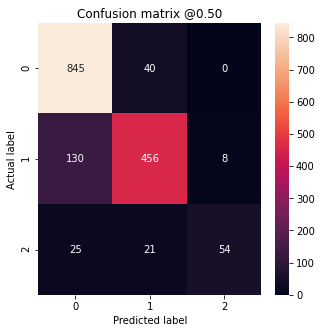

In [ ]:
# Evaluate model based on Vgg16
baseline_results = model_vgg16.evaluate(x_test, y_test,
                                  batch_size=BS, verbose=0)
for name, value in zip(model_vgg16.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(y_test.argmax(axis=1), test_predictions_baseline_vgg16.argmax(axis=1))

Text(0.5, 15.0, 'Predicted label')

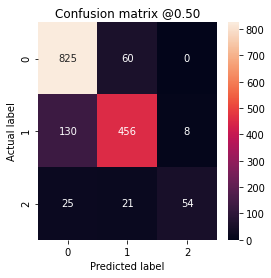

In [91]:
plt.figure(figsize=(4,4))
cm = [[825,  60,   0],
 [130, 456,   8],
 [ 25 , 21,  54]]
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.2f}'.format(0.5))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5, 69.0, 'Predicted label')

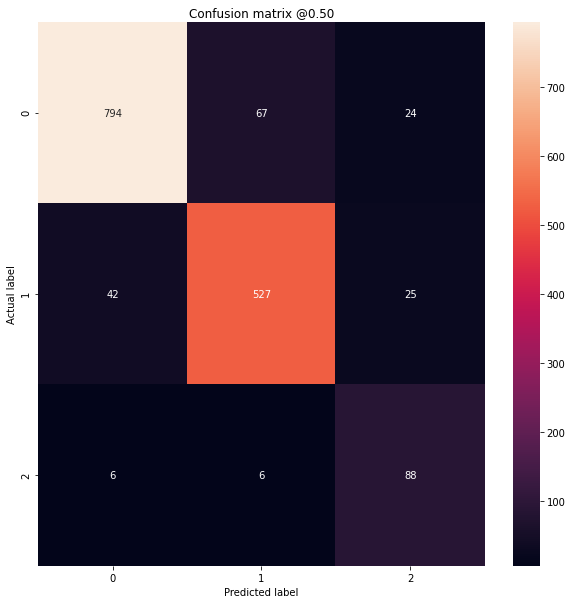

In [89]:
plt.figure(figsize=(4,4))
cm = [[794,67,24],
 [ 42,527,25],
 [  6 ,6, 88],]
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix @{:.2f}'.format(0.5))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

loss :  0.29100722074508667
tp :  1400.0
fp :  156.0
tn :  3002.0
fn :  179.0
accuracy :  0.892336905002594
precision :  0.8997429013252258
recall :  0.8866370916366577
auc :  0.9755496978759766


[[794  67  24]
 [ 42 527  25]
 [  6   6  88]]


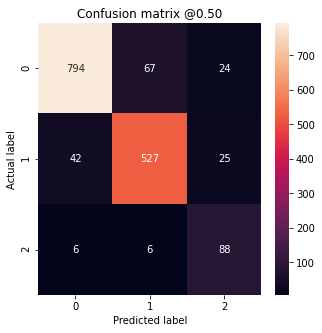

In [77]:
# Evaluate model based on ResNet50
baseline_results = model_ResNet50.evaluate(x_test, y_test,
                                  batch_size=BS, verbose=0)
for name, value in zip(model_ResNet50.metrics_names, baseline_results):
  print(name, ': ', value)
print('\n')
plot_cm(y_test.argmax(axis=1), test_predictions_baseline_RestNet50.argmax(axis=1))

## ROC Curves

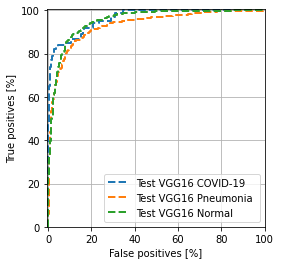

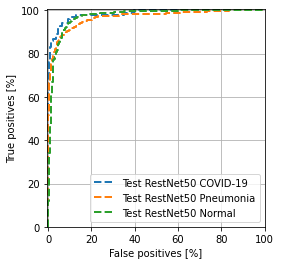

In [ ]:

# plot_roc("Train VGG16 ", y_train[:,-1], train_predictions_baseline_vgg16[:,-1], color=colors[0])
plot_roc("Test VGG16 COVID-19 ", y_test[:,-1], test_predictions_baseline_vgg16[:,-1], color=colors[0], linestyle='--')
plot_roc("Test VGG16 Pneumonia ", y_test[:,-2], test_predictions_baseline_vgg16[:,-2], color=colors[1], linestyle='--')
plot_roc("Test VGG16 Normal ", y_test[:,-3], test_predictions_baseline_vgg16[:,-3], color=colors[2], linestyle='--')
plt.legend(loc='lower right')
plt.show()

# plot_roc("Train RestNet50", y_train[:,-1], train_predictions_baseline_RestNet50[:,-1], color=colors[1])
plot_roc("Test RestNet50 COVID-19", y_test[:,-1], test_predictions_baseline_RestNet50[:,-1], color=colors[0], linestyle='--')
plot_roc("Test RestNet50 Pneumonia", y_test[:,-2], test_predictions_baseline_RestNet50[:,-2], color=colors[1], linestyle='--')
plot_roc("Test RestNet50 Normal", y_test[:,-3], test_predictions_baseline_RestNet50[:,-3], color=colors[2], linestyle='--')

plt.legend(loc='lower right')

In [ ]:
#adapted from https://github.com/shlizee/OpticalNN

# Performs an fftshift operation on the last two dimensions of a 4-D input tensor
def fftshift_tf(data):
    
    dims = tf.shape(data)
    num = dims[3]
    shiftAmt = (num - 1) / 2
    shiftAmt = tf.cast(shiftAmt, int32)
    output = tf.manip.roll(data, shift=shiftAmt, axis=2)
    output = tf.manip.roll(output, shift=shiftAmt, axis=3)
    
    return output

# Performs an ifftshift operation on the last two dimensions of a 4-D input tensor
def ifftshift_tf(data):
    
    dims = tf.shape(data)
    num = dims[3]
    shiftAmt = (num + 1) / 2
    shiftAmt = tf.cast(shiftAmt, int32)
    output = tf.manip.roll(data, shift=shiftAmt, axis=2)
    output = tf.manip.roll(output, shift=shiftAmt, axis=3)
    
    return output

# Generates the phase for a lens based on the focal length variable "f". Other referenced variables are global
def generate_phase():
    
    phase = tf.constant(2*pi, tf.float32) / Lambda * (tf.sqrt(tf.square(x_tensor) + tf.square(y_tensor) + tf.square(f)) - f)
    phase = tf.cast(phase, tf.complex64)
    return phase

# Generates the Fourier space propagator based on the focal length variable "f". Other referenced variables are global
def generate_propagator():
    
    propagator = tf.exp(1j * k_z * tf.cast(f, tf.complex64))
    propagator = ifftshift_tf(propagator)
    
    return propagator


# Propagate an input E-field distribution along the optical axis using the defined propagator
def propagate(input_field, propagator):
    
    # Propagate using tensorflow
    output = tf.ifft2d(tf.fft2d(input_field) * propagator)
    
    return output

# Define parameters
period = 0.25E-5 # Set the quasi-period, a hyperparameter which fixes the system's width and the pixel size
f = tf.Variable(0.3E-2, tf.float32) # Set the focal length a training variable
multiplier = 1 # Needs to be an odd number
width_pixels = multiplier * 224 # Width of the image in pixels
n_sub = (int) ((width_pixels + 1) / 2)
A = n_sub * period # Set the metasurface radius
n = (int) (2 * n_sub - 1) # Number of pixels along one dimension (full image is nxn)

In [ ]:
# Define a constant wavelength tensor
Lambdas = [633E-9, 532E-9, 442E-9] # Set the wavelengths
channel = ones((96, 1, 227, 227))
Lambda = concatenate((Lambdas[0] * channel, Lambdas[1] * channel, Lambdas[2] * channel), axis=1)
